In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")


# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the Loan data

neodata = pd.read_csv(r"C:\Users\Narasimha Reddy\OneDrive\Desktop\intern\neo.csv", header=0)

# Copy to back-up file

neodata_bk = neodata.copy()

# Display first 5 values

neodata.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [3]:
neodata.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

In [4]:
neodata.duplicated().sum()

0

In [5]:
neodata.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [6]:
neodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
neodata.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [8]:
neodata.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [9]:
neodata.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

<AxesSubplot:xlabel='absolute_magnitude', ylabel='Count'>

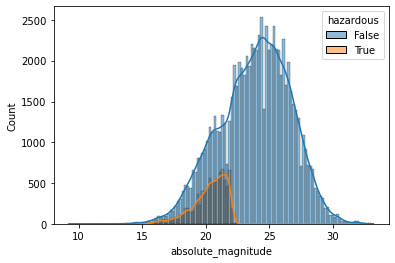

In [10]:
sns.histplot(data=neodata, x='absolute_magnitude', kde=True, hue='hazardous')

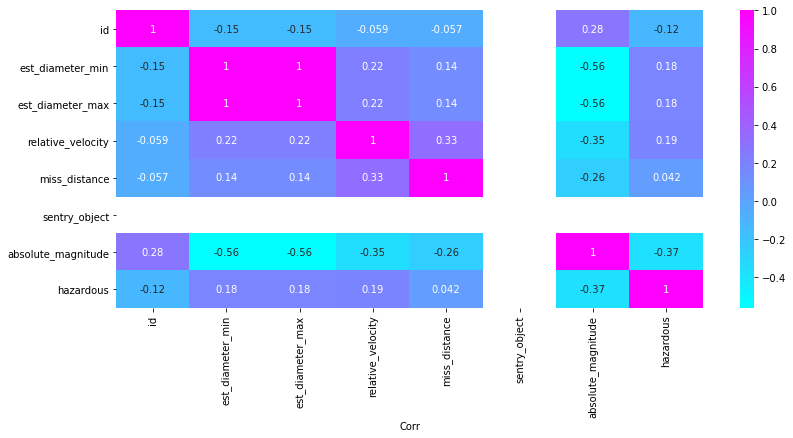

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(12, 6))
sns.heatmap(neodata.corr(), annot=True,cmap=plt.cm.cool)
plt.tight_layout()
plt.xlabel('Corr')
plt.show()

In [12]:
neodata.drop('name',axis=1,inplace=True)

In [13]:
neodata.drop('orbiting_body',axis=1,inplace=True)

In [14]:
neodata.drop('sentry_object',axis=1,inplace=True)

In [15]:
neodata

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,2277475,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,2512244,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,3596030,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,3667127,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...,...
90831,3763337,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,3837603,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,54017201,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,54115824,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


In [16]:
neodata.columns

Index(['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude', 'hazardous'],
      dtype='object')

<AxesSubplot:>

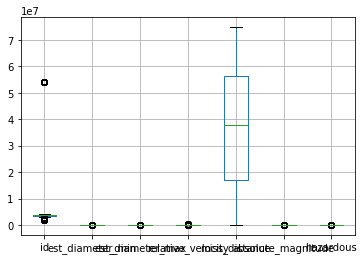

In [17]:
plot=['id','est_diameter_min', 'est_diameter_max','relative_velocity', 'miss_distance','absolute_magnitude', 'hazardous']
neodata.boxplot(plot)

In [18]:
numeric_df=['id','est_diameter_min', 'est_diameter_max','relative_velocity', 'miss_distance','absolute_magnitude', 'hazardous']

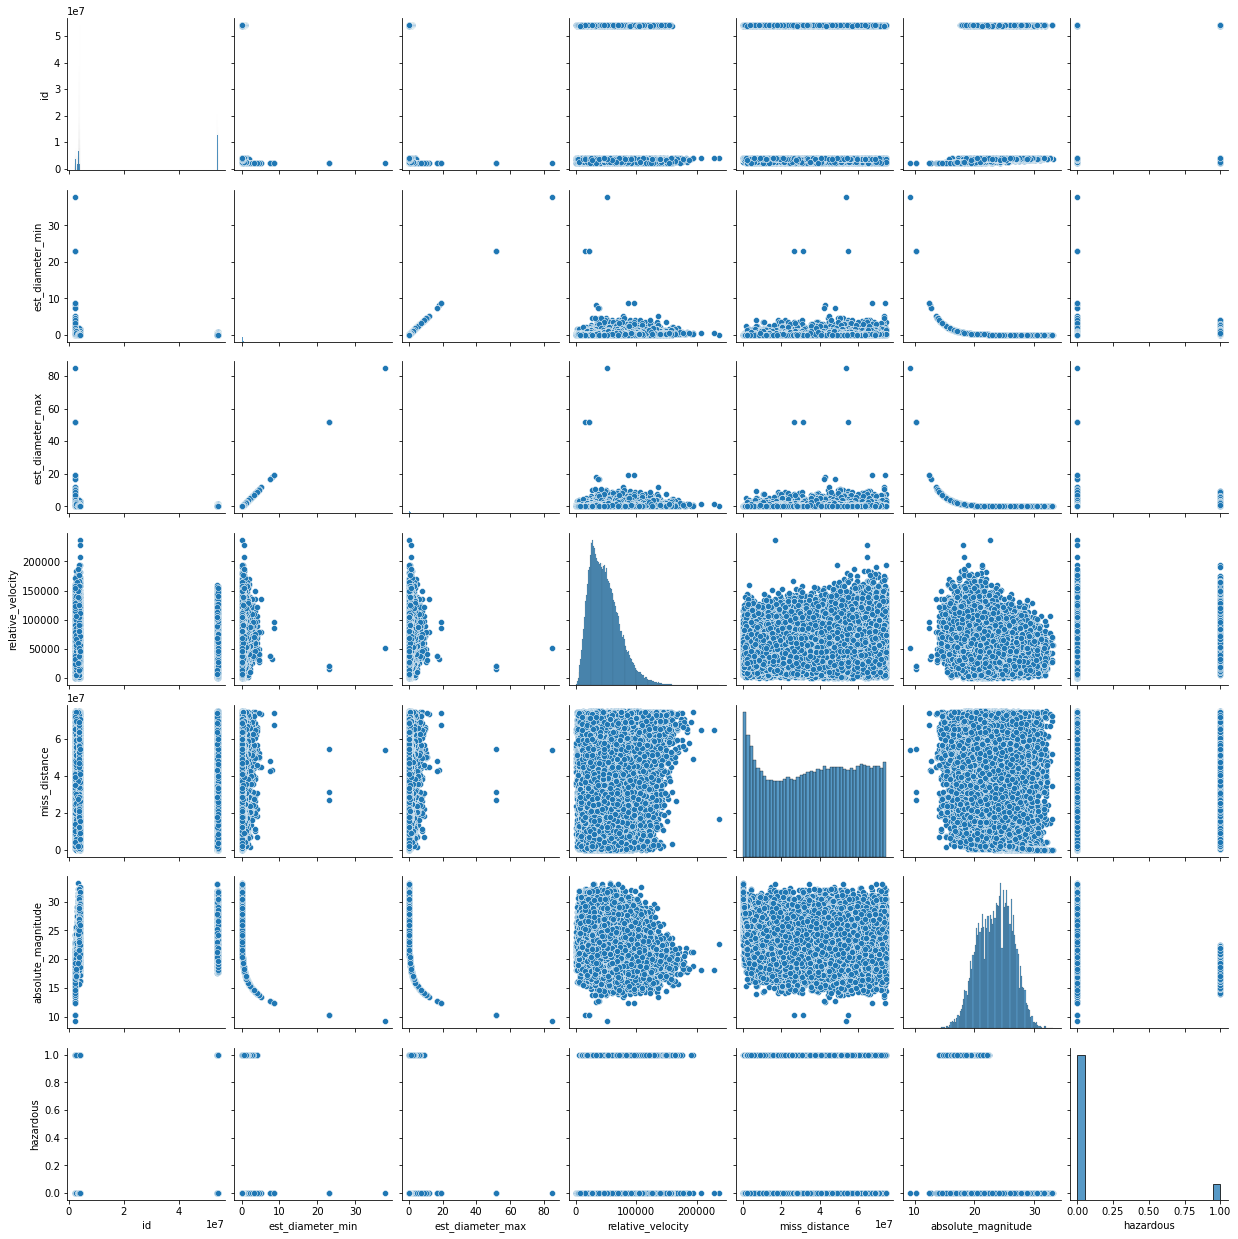

In [19]:
# create pairplot To plot multiple pairwise bivariate distributions in a dataset
fig= sns.pairplot(neodata[numeric_df])

In [20]:
'''outliners=['id','est_diameter_min', 'est_diameter_max','relative_velocity', 'miss_distance','absolute_magnitude', 'hazardous']

#for i in outliners:

    # IQR
    Q1 = np.percentile(neodata[i], 25,
                   interpolation = 'midpoint')
    Q3 = np.percentile(neodata[i], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    print("Old Shape: ", neodata.shape)
    # Upper bound
    upper = np.where(neodata[i] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(neodata[i] <= (Q1-1.5*IQR))
    

neodata.drop(upper[2], inplace = True)
neodata.drop(lower[2], inplace = True)
print("New Shape: ", neodata.shape)'''

    

'outliners=[\'id\',\'est_diameter_min\', \'est_diameter_max\',\'relative_velocity\', \'miss_distance\',\'absolute_magnitude\', \'hazardous\']\n\n#for i in outliners:\n\n    # IQR\n    Q1 = np.percentile(neodata[i], 25,\n                   interpolation = \'midpoint\')\n    Q3 = np.percentile(neodata[i], 75,\n                   interpolation = \'midpoint\')\n    IQR = Q3 - Q1\n    print("Old Shape: ", neodata.shape)\n    # Upper bound\n    upper = np.where(neodata[i] >= (Q3+1.5*IQR))\n    # Lower bound\n    lower = np.where(neodata[i] <= (Q1-1.5*IQR))\n    \n\nneodata.drop(upper[2], inplace = True)\nneodata.drop(lower[2], inplace = True)\nprint("New Shape: ", neodata.shape)'

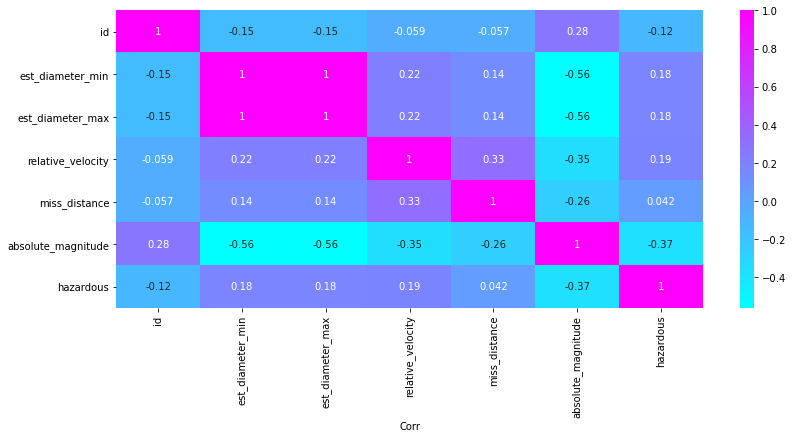

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(12, 6))
sns.heatmap(neodata.corr(), annot=True,cmap=plt.cm.cool)
plt.tight_layout()
plt.xlabel('Corr')
plt.show()

In [22]:
neodata['hazardous'].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
neodata['hazardous']=LE.fit_transform(neodata['hazardous'])

In [24]:
#Count target or dependent variable by 0 or 1 and their proportion(>10:1,then the dataset is imbalance data)
hazardous_count=neodata.hazardous.value_counts()
print('Class 0:',hazardous_count[0])
print('Class 1:',hazardous_count[1])
print('Proportion:',round(hazardous_count[0]/hazardous_count[1],2)),':1'
print('Total records:',len(neodata))

Class 0: 81996
Class 1: 8840
Proportion: 9.28
Total records: 90836


In [25]:
neodata['hazardous'].isna().sum()

0

In [26]:
IndepVar = []
for col in neodata.columns:
    if col != 'hazardous':
        IndepVar.append(col)

TargetVar = 'hazardous'

x = neodata[IndepVar]
y = neodata[TargetVar]

In [27]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((63585, 6), (27251, 6), (63585,), (27251,))

In [28]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [29]:
neodata.isna().sum()

id                    0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [34]:
# Load the Results dataset

CSResults = pd.read_csv(r"C:\Users\Narasimha Reddy\OneDrive\Desktop\intern\nani.csv", header=0)

CSResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[  281  2373]
 [  534 24063]]
Outcome values : 
 281 2373 534 24063
Classification report : 
               precision    recall  f1-score   support

           1       0.34      0.11      0.16      2654
           0       0.91      0.98      0.94     24597

    accuracy                           0.89     27251
   macro avg       0.63      0.54      0.55     27251
weighted avg       0.86      0.89      0.87     27251

Accuracy : 89.3 %
Precision : 34.5 %
Recall : 10.6 %
F1 Score : 0.162
Specificity or True Negative Rate : 97.8 %
Balanced Accuracy : 54.2 %
roc_auc_score: 0.542


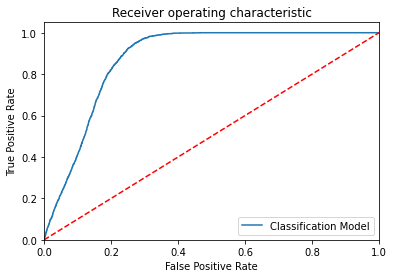

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 1180  1474]
 [ 3115 21482]]
Outcome values : 
 1180 1474 3115 21482
Classification report : 
               precision    recall  f1-score   support

           1       0.27      0.44      0.34      2654
           0       0.94      0.87      0.90     24597

    accuracy                           0.83     27251
   macro avg       0.61      0.66      0.62     27251
weighted avg       0.87      0.83      0.85     27251

Accuracy : 83.2 %
Precision : 27.5 %
Recall : 44.5 %
F1 Score : 0.34
Specificity or True Negative Rate : 87.3 %
Balanced Accuracy : 65.9 %
roc_auc_score: 0.659


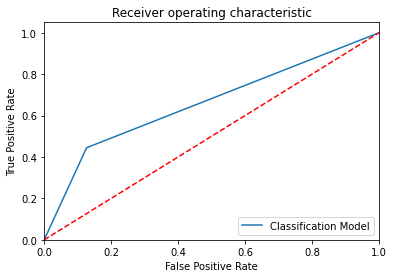

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  650  2004]
 [  685 23912]]
Outcome values : 
 650 2004 685 23912
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.24      0.33      2654
           0       0.92      0.97      0.95     24597

    accuracy                           0.90     27251
   macro avg       0.70      0.61      0.64     27251
weighted avg       0.88      0.90      0.89     27251

Accuracy : 90.1 %
Precision : 48.7 %
Recall : 24.5 %
F1 Score : 0.326
Specificity or True Negative Rate : 97.2 %
Balanced Accuracy : 60.8 %
roc_auc_score: 0.609


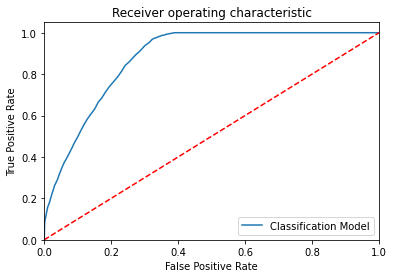

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[  527  2127]
 [  475 24122]]
Outcome values : 
 527 2127 475 24122
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.20      0.29      2654
           0       0.92      0.98      0.95     24597

    accuracy                           0.90     27251
   macro avg       0.72      0.59      0.62     27251
weighted avg       0.88      0.90      0.88     27251

Accuracy : 90.5 %
Precision : 52.6 %
Recall : 19.9 %
F1 Score : 0.288
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 59.0 %
roc_auc_score: 0.59


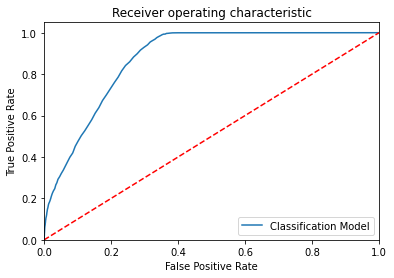

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  738  1916]
 [ 1017 23580]]
Outcome values : 
 738 1916 1017 23580
Classification report : 
               precision    recall  f1-score   support

           1       0.42      0.28      0.33      2654
           0       0.92      0.96      0.94     24597

    accuracy                           0.89     27251
   macro avg       0.67      0.62      0.64     27251
weighted avg       0.88      0.89      0.88     27251

Accuracy : 89.2 %
Precision : 42.1 %
Recall : 27.8 %
F1 Score : 0.335
Specificity or True Negative Rate : 95.9 %
Balanced Accuracy : 61.8 %
roc_auc_score: 0.618


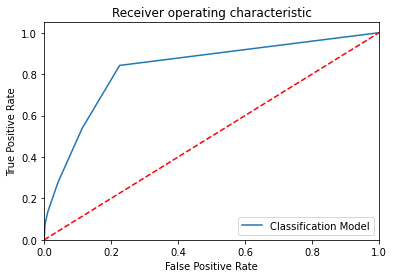

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 1890   764]
 [ 4414 20183]]
Outcome values : 
 1890 764 4414 20183
Classification report : 
               precision    recall  f1-score   support

           1       0.30      0.71      0.42      2654
           0       0.96      0.82      0.89     24597

    accuracy                           0.81     27251
   macro avg       0.63      0.77      0.65     27251
weighted avg       0.90      0.81      0.84     27251

Accuracy : 81.0 %
Precision : 30.0 %
Recall : 71.2 %
F1 Score : 0.422
Specificity or True Negative Rate : 82.1 %
Balanced Accuracy : 76.6 %
roc_auc_score: 0.766


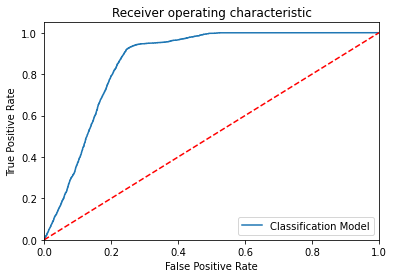

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[  733  1921]
 [  971 23626]]
Outcome values : 
 733 1921 971 23626
Classification report : 
               precision    recall  f1-score   support

           1   

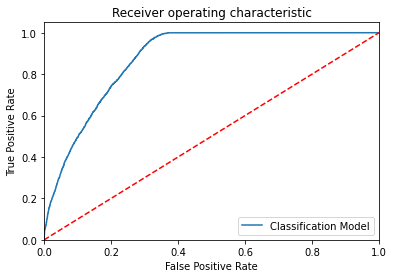

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[  844  1810]
 [  803 23794]]
Outcome values : 
 844 1810 803 23794
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.32      0.39      2654
           0       0.93      0.97      0.95     24597

    accuracy                           0.90     27251
   macro avg       0.72      0.64      0.67     27251
weighted avg       0.89      0.90      0.89     27251

Accuracy : 90.4 %
Precision : 51.2 %
Recall : 31.8 %
F1 Score : 0.392
Specificity or True Negative Rate : 96.7 %
Balanced Accuracy : 64.2 %
roc_auc_score: 0.643


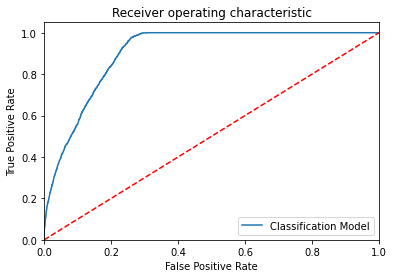

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[  740  1914]
 [  723 23874]]
Outcome values : 
 740 1914 723 23874
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.28      0.36      2654
           0       0.93      0.97      0.95     24597

    accuracy                           0.90     27251
   macro avg       0.72      0.62      0.65     27251
weighted avg       0.88      0.90      0.89     27251

Accuracy : 90.3 %
Precision : 50.6 %
Recall : 27.9 %
F1 Score : 0.359
Specificity or True Negative Rate : 97.1 %
Balanced Accuracy : 62.5 %
roc_auc_score: 0.625


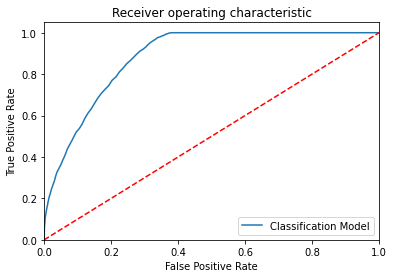

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(max_depth=5)
Confusion matrix : 
 [[  613  2041]
 [  362 24235]]
Outcome values : 
 613 2041 362 24235
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.23      0.34      2654
           0       0.92      0.99      0.95     24597

    accuracy                           0.91     27251
   macro avg       0.78      0.61      0.65     27251
weighted avg       0.89      0.91      0.89     27251

Accuracy : 91.2 %
Precision : 62.9 %
Recall : 23.1 %
F1 Score : 0.338
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 60.8 %
roc_auc_score: 0.608


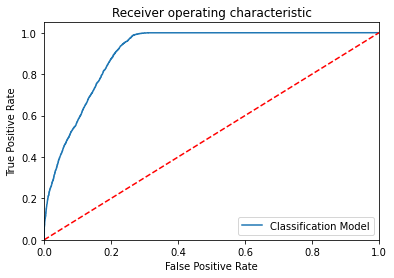

-----------------------------------------------------------------------------------------------------


In [35]:
# Build the Calssification models with Over Sampling and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier()
ModelGNB=GaussianNB()
ModelXGB=XGBClassifier()
ModelLGB = lgb.LGBMClassifier()
ModelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)
ModelGBC = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# Evalution matrix for all the algorithm

MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN,ModelGNB,ModelXGB,ModelLGB,ModelBAG,ModelGBC]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive': tp,
               'False Negative': fn, 
               'False Positive': fp, 
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [37]:
CSResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),281,2373,534,24063,0.893,0.345,0.106,0.162,0.978,MCC,0.542084,0.542
1,DecisionTreeClassifier(),1180,1474,3115,21482,0.832,0.275,0.445,0.340,0.873,MCC,0.658985,0.659
2,"(DecisionTreeClassifier(max_features='sqrt', r...",650,2004,685,23912,0.901,0.487,0.245,0.326,0.972,MCC,0.608532,0.608
3,"(ExtraTreeClassifier(random_state=23587676), E...",527,2127,475,24122,0.905,0.526,0.199,0.288,0.981,MCC,0.589628,0.590
4,KNeighborsClassifier(),738,1916,1017,23580,0.892,0.421,0.278,0.335,0.959,MCC,0.618362,0.618


In [36]:
CSResults.to_csv(r"C://Users//Narasimha Reddy//OneDrive//Desktop//intern//nani.csv")